In [1]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

### NLP Analysis - 2023 Presidential Debate, Second Round

The following analysis has been conducted on the text of the 2023 Presidential Debate, Second Round for the Presidency of Ecuador. Its aim is to highlight aspects of interest regarding the participation of both candidates.

By. Vanessa Salazar P. MsC.

In [2]:
datetime_list = []
participant_list = []
text_list = []

with open('texto_debate.txt', encoding="utf8") as db_text:
    lines = db_text.readlines()

i = 0
while i < len(lines):

    datetime = lines[i][:8]
    participant = lines[i][9:].rstrip()
    i += 1
    text = lines[i].strip()
    i += 2

    datetime_list.append(datetime)
    participant_list.append(participant)
    text_list.append(text)

data = {'hora': datetime_list, 'participante': participant_list, 'texto': text_list}
df = pd.DataFrame(data)

In [3]:
candidatos = ['Daniel Noboa', 'Luisa Gonzalez']
ejes_tematicos = ['Económico', 'Seguridad', 'Social', 'Político']

for i in range(len(df)):
    if df.loc[i, "participante"] in candidatos:
        if df.loc[i, "hora"] < '00:34:26':
            df.loc[i, "eje_tematico"] = 'Economico'
        elif df.loc[i, "hora"]  > '00:34:26' and df['hora'][i] < '01:03:18' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[1]
        elif df.loc[i, "hora"]  > '01:03:18' and df['hora'][i] < '01:27:44' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[2]
        elif df.loc[i, "hora"]  > '01:27:44' and df['hora'][i] < '01:54:40' :
            df.loc[i, "eje_tematico"] = ejes_tematicos[3]
        else: 
            df.loc[i, "eje_tematico"] = 'despedida'

In [4]:
df

,hora,participante,texto,eje_tematico
0,00:00:51,Locutor,"Iniciamos con Ecuador debate 2023, segunda vue...",NaN
1,00:01:30,Ruth del Salto,Muy buenas noches ecuatorianas y ecuatorianos ...,NaN
2,00:03:05,Locutora,"Daniel Noboa sin guayaquileño, de 35 años. Cas...",NaN
3,00:04:10,Ruth del Salto,"Y justamente, los debates son símbolo de madur...",NaN
4,00:04:45,Locutor,"Bienvenidos a Ecuador debate 2023, segunda vue...",NaN
...,...,...,...,...
174,01:55:13,Daniel Noboa,Ecuatorianos. Muchas gracias. Gracias por este...,despedida
175,01:56:00,Ruth del Salto,Gracias también candidato ha llegado el turno ...,NaN
176,01:56:11,Luisa Gonzalez,Muchas gracias. Quiero dirigirme a las mujeres...,despedida
177,01:56:55,Ruth del Salto,Siempre siempre nos va a faltar tiempo. Candid...,NaN


In [5]:
df['texto_limpio'] = df['texto'].apply(str. lower)
#remove stop words
#stop = stopwords.words('spanish')
stop = ['dia', 'de', 'la', 'que', 'el', 'usted', 'ruth', 'tener', 'dia ', 'en', 'y', 'mismo', 'a', 'los', 'del', 'asi', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'sin', 'sobre', 'también', '1', 'me', 'hay', 'donde', 'quien', 'desde', 'nos', 'durante', 'uno', 'les', 'ni', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'quienes', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas''vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'estará', 'estaréis', 'estarán', 'estaría', 'estarías', 'estaríamos', 'estaríais', 'estarían', 'estaba', 'estabas', 'estábamos', 'estabais', 'estaban', 'estuve', 'estuviste', 'estuvo', 'estuvisteis', 'estuvieron', 'estuviera', 'estuvieras', 'estuviéramos', 'estuvierais', 'estuvieran', 'estuviese', 'estuvieses', 'estuviésemos', 'estuvieseis', 'estuviesen', 'estando', 'estada', 'estadas', 'estad', 'he', 'has', 'ha',  'habéis', 'han', 'haya', 'hayas', 'hayamos', 'hayáis', 'hayan', 'habré', 'habrás', 'habrá', 'habréis', 'habrán', 'habría', 'habrías', 'habríamos', 'habríais', 'habrían', 'había', 'habías', 'habíamos', 'habíais', 'habían', 'hube', 'hubiste', 'hubo', 'hubimos', 'hubisteis', 'hubieron', 'hubiera', 'hubieras', 'hubiéramos', 'hubierais', 'hubieran', 'hubiese', 'hubieses', 'hubiésemos', 'hubieseis', 'hubiesen', 'habiendo', 'habido', 'habida', 'habidos', 'habidas', 'soy', 'eres', 'es', 'sois', 'son', 'sea', 'seas', 'seamos', 'seáis', 'sean', 'seré', 'serás', 'será', 'seréis', 'serán', 'sería', 'serías', 'seríamos', 'seríais', 'serían', 'era', 'eras', 'éramos', 'erais', 'eran', 'fui', 'fuiste', 'fue', 'fuimos', 'fuisteis', 'fueron', 'fuera', 'fueras', 'fuéramos', 'fuerais', 'fueran', 'fuese', 'fueses', 'fuésemos', 'fueseis', 'fuesen', 'sintiendo', 'sentida', 'sentidos', 'sentidas', 'sentid', 'tengo', 'tienes', 'tiene', 'tenéis', 'asi', 'tienen', 'tenga', 'tengas', 'tengáis', 'tengan', 'tendré', 'tendrás', 'tendrá',  'tendréis', 'tendrán', 'tendría', 'tendrías', 'tendríamos', 'tendríais', 'tendrían', 'tenía', 'tenías', 'teníamos', 'teníais', 'tenían', 'tuve', 'tuviste', 'tuvo', 'tuvimos', 'tuvisteis', 'tuvieron', 'tuviera', 'tuvieras', 'tuviéramos', 'tuvierais', 'tuvieran', 'tuviese', 'tuvieses', 'tuviésemos', 'tuvieseis', 'tuviesen', 'teniendo', 'tenido', 'tenida', 'tenidos', 'tenidas', 'tened']
stop.extend(['va','si','pues', 'asi', 'dia'])

df['texto_limpio'] = df['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#remove special characters
for i in range(len(df)):
    df.loc[i, "texto_limpio"] = df.loc[i, "texto_limpio"].replace('í','i').replace('á','a').replace('é','e').replace('ó','o').replace('ú','u')
    df.loc[i, "texto_limpio"] = re.sub('[^A-Za-z0-9-ñ]+', ' ', df['texto_limpio'][i])

df['texto_limpio'] = df['texto_limpio'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#words count of cleaned text
df["words_count_texto"] = df['texto_limpio'].str.split().str.len()

In [6]:
df_DN = df[df['participante'] == candidatos[0]]
df_LG = df[df['participante'] == candidatos[1]]

#frequency word analysis 1 word
common_words_DN = pd.Series(' '.join(df_DN['texto_limpio']).split()).value_counts()[0:20][::-1]
common_words_LG = pd.Series(' '.join(df_LG['texto_limpio']).split()).value_counts()[0:20][::-1]

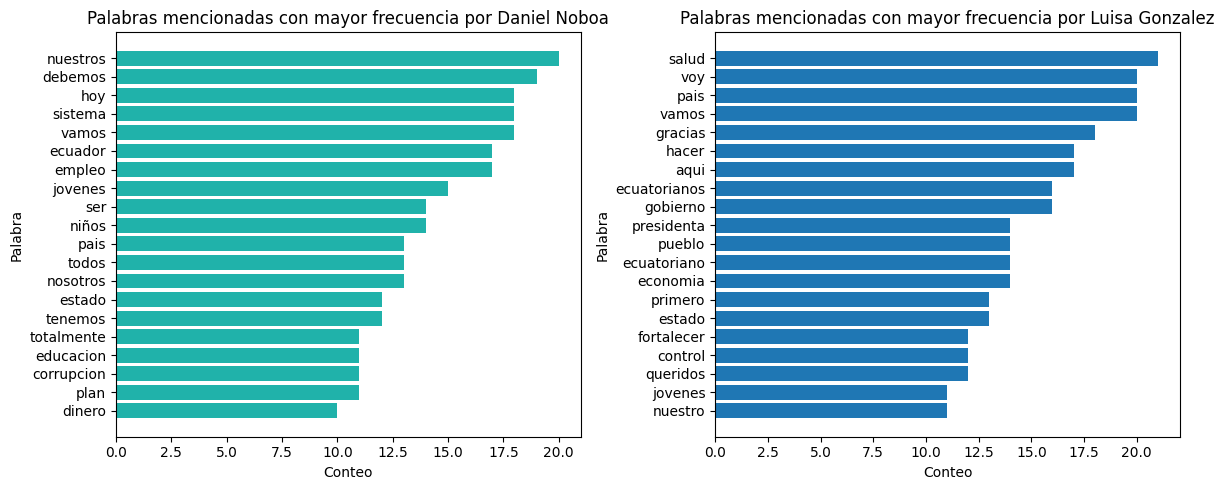

In [7]:
plt.figure(figsize=(12, 5))

# Subplot 1 - Bar plot for value_counts of DN
plt.subplot(1, 2, 1)
plt.barh(common_words_DN.index, common_words_DN.values, color='lightseagreen')
plt.title('Palabras mencionadas con mayor frecuencia por Daniel Noboa')
plt.xlabel('Conteo')
plt.ylabel('Palabra')

# Subplot 2 - Bar plot for value_counts of LG
plt.subplot(1, 2, 2)
plt.barh(common_words_LG.index, common_words_LG.values)
plt.title('Palabras mencionadas con mayor frecuencia por Luisa Gonzalez')
plt.xlabel('Conteo')
plt.ylabel('Palabra')

plt.tight_layout()
plt.show()


In [167]:
#frequency word analysis 2 words

text_DN = ' '.join(df_DN['texto_limpio'])
words = re.findall(r'\w+', text_DN)
two_words = [' '.join(ws) for ws in zip(words, words[1:], )]
wordscount_DN = {w:f for w, f in Counter(two_words).most_common() if f > 2}
wordscount_DN = list(wordscount_DN.items())[:12][::-1]

keysDN, valuesDN = zip(*wordscount_DN)

text_LG=' '.join(df_LG['texto_limpio'])
words = re.findall(r'\w+', text_LG)
two_words = [' '.join(ws) for ws in zip(words, words[1:])]
wordscount_LG = {w:f for w, f in Counter(two_words).most_common() if f > 3}
wordscount_LG = list(wordscount_LG.items())[:12][::-1]

keysLG, valuesLG = zip(*wordscount_LG)

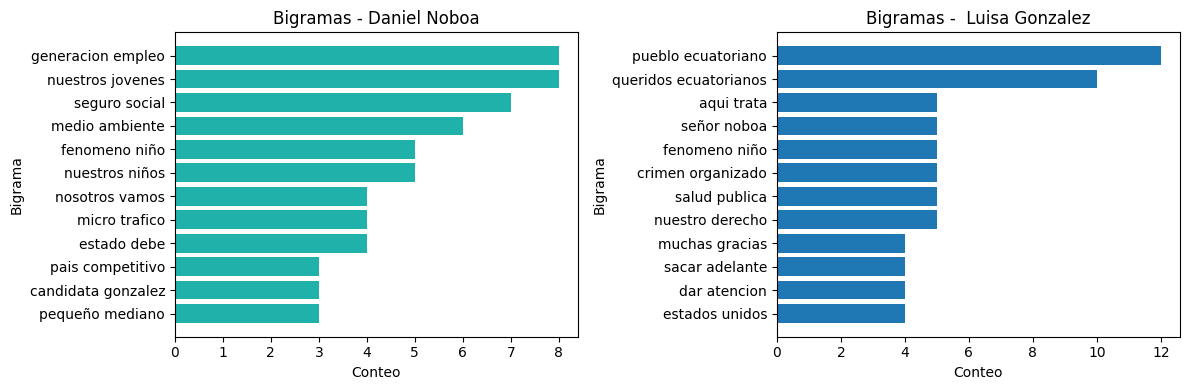

In [168]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.barh(keysDN, valuesDN, color='lightseagreen')
plt.title('Bigramas - Daniel Noboa')
plt.xlabel('Conteo')
plt.ylabel('Bigrama')

# Subplot 2 - Bar plot for value_counts of LG
plt.subplot(1, 2, 2)
plt.barh(keysLG, valuesLG)
plt.title('Bigramas -  Luisa Gonzalez')
plt.xlabel('Conteo')
plt.ylabel('Bigrama')

plt.tight_layout()
plt.show()

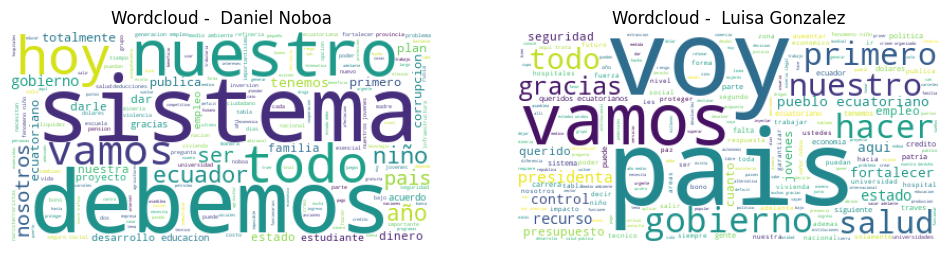

In [176]:
words_DN = pd.Series(' '.join(df_DN['texto_limpio']))
words_LG = pd.Series(' '.join(df_LG['texto_limpio']))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_DN[0])
plt.imshow(wordcloud)
plt.title('Wordcloud -  Daniel Noboa')
plt.axis("off")

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = "white",  max_words = 1000).generate(words_LG[0])
plt.imshow(wordcloud)
plt.title('Wordcloud -  Luisa Gonzalez')
plt.axis("off")
plt.show();

In [146]:
words_LG[0]

'saludo'